# Analysing New York Schools Performance

Author: Dilliram Kadariya

## Problem Statement

The project aims to analyze the test scores across the New York school districts and gain insights or trends to improve the quality of the New York schools. It uses the latest New York state's assessment results of math for grades 3 through 8 of years between 2006-2012.

## Data Source

Data for New York math tests results are at the following location:

https://catalog.data.gov/dataset/2006-2012-math-test-results-district-all-students

The first few columns in the file are: District,Grade,Year,Demographic,Number Tested, and Mean Scale Score.

## 1. Acquiring Data

### Load the school results into a dataframe called "school_data" and display the contents as a dataframe.

In [1]:
import os
import pandas as pd
from pandas import Series, DataFrame

school_data = pd.read_csv('Math Test Results DS.csv')

school_data

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,936,673,73,7.8,170,18.2,484,51.7,209,22.3,693,74.0
1,1,3,2007,All Students,836,679,48,5.7,86,10.3,511,61.1,191,22.8,702,84.0
2,1,3,2008,All Students,862,686,17,2.0,94,10.9,537,62.3,214,24.8,751,87.1
3,1,3,2009,All Students,914,691,8,0.9,66,7.2,598,65.4,242,26.5,840,91.9
4,1,3,2010,All Students,866,697,89,10.3,257,29.7,279,32.2,241,27.8,520,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,32,All Grades,2008,All Students,9028,664,705,7.8,2025,22.4,5059,56.0,1239,13.7,6298,69.8
1564,32,All Grades,2009,All Students,8828,673,365,4.1,1526,17.3,5399,61.2,1538,17.4,6937,78.6
1565,32,All Grades,2010,All Students,8508,672,1187,14.0,3429,40.3,2671,31.4,1221,14.4,3892,45.7
1566,32,All Grades,2011,All Students,8221,671,1072,13.0,3340,40.6,2832,34.4,977,11.9,3809,46.3


## 2. Exploring the Data

### A. Display the values and associated frequencies of the grade column. 

In [10]:
school_data['Grade'].value_counts()


3             224
4             224
5             224
6             224
7             224
8             224
All Grades    224
Name: Grade, dtype: int64

### B. Display the values and associated frequencies of the district column, sorting the result by district number.

In [24]:
school_data['District'].value_counts().sort_values(ascending=True)




1     49
3     49
4     49
5     49
6     49
7     49
8     49
9     49
10    49
11    49
12    49
13    49
14    49
15    49
16    49
18    49
19    49
20    49
21    49
22    49
23    49
24    49
25    49
26    49
27    49
28    49
29    49
30    49
31    49
2     49
17    49
32    49
Name: District, dtype: int64

### C. Display the values and associated frequencies of the year column, sorting the result by year.

In [25]:
sorted_year = school_data['Year'].value_counts().sort_values(ascending=True)
sorted_year

2006    224
2007    224
2008    224
2009    224
2010    224
2011    224
2012    224
Name: Year, dtype: int64

## 3. Preparing Data

### A. Displays all the rows that have the do not have an explicit grade in the Grade column. 

In [28]:
filtered_rows = school_data[school_data['Grade'].isnull() | (school_data['Grade'] == 'All Grades')]
filtered_rows

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
42,1,All Grades,2006,All Students,5389,659,710,13.2,1547,28.7,2250,41.8,882,16.4,3132,58.1
43,1,All Grades,2007,All Students,5208,666,512,9.8,1252,24.0,2449,47.0,995,19.1,3444,66.1
44,1,All Grades,2008,All Students,5186,674,279,5.4,984,19.0,2690,51.9,1233,23.8,3923,75.6
45,1,All Grades,2009,All Students,5183,682,187,3.6,723,13.9,2776,53.6,1497,28.9,4273,82.4
46,1,All Grades,2010,All Students,5167,684,527,10.2,1678,32.5,1545,29.9,1417,27.4,2962,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,32,All Grades,2008,All Students,9028,664,705,7.8,2025,22.4,5059,56.0,1239,13.7,6298,69.8
1564,32,All Grades,2009,All Students,8828,673,365,4.1,1526,17.3,5399,61.2,1538,17.4,6937,78.6
1565,32,All Grades,2010,All Students,8508,672,1187,14.0,3429,40.3,2671,31.4,1221,14.4,3892,45.7
1566,32,All Grades,2011,All Students,8221,671,1072,13.0,3340,40.6,2832,34.4,977,11.9,3809,46.3


### B. Remove all the rows that don't have an explicit grade in the Grade column.


In [33]:
school_data= school_data[school_data['Grade'].notnull() & (school_data['Grade'] != 'All Grades')]
school_data

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,936,673,73,7.8,170,18.2,484,51.7,209,22.3,693,74.0
1,1,3,2007,All Students,836,679,48,5.7,86,10.3,511,61.1,191,22.8,702,84.0
2,1,3,2008,All Students,862,686,17,2.0,94,10.9,537,62.3,214,24.8,751,87.1
3,1,3,2009,All Students,914,691,8,0.9,66,7.2,598,65.4,242,26.5,840,91.9
4,1,3,2010,All Students,866,697,89,10.3,257,29.7,279,32.2,241,27.8,520,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,32,8,2008,All Students,1517,650,202,13.3,528,34.8,686,45.2,101,6.7,787,51.9
1557,32,8,2009,All Students,1590,662,106,6.7,406,25.5,923,58.1,155,9.7,1078,67.8
1558,32,8,2010,All Students,1600,662,314,19.6,698,43.6,462,28.9,126,7.9,588,36.8
1559,32,8,2011,All Students,1541,664,215,14.0,708,45.9,498,32.3,120,7.8,618,40.1


## 4. Exploring the Data

### A. Lets see how many students total were tested in each grade level.

In [69]:
grade_tested_students = school_data.groupby(['Grade'])['Number Tested'].sum()
grade_tested_students1 = grade_tested_students.reset_index().sort_values(by=['Grade'], ascending=True)
grade_tested_students1


,Grade,Number Tested
0,3,503289
1,4,498169
2,5,496265
3,6,492435
4,7,500868
5,8,510112


### B. Lets see how many students total were tested in each district.

In [63]:
district_tested_students = school_data.groupby(['District'])['Number Tested'].sum()
district_tested_students1 = district_tested_students.reset_index().sort_values(by=['District'], ascending=True)
district_tested_students1

,District,Number Tested
0,1,36228
1,2,96494
2,3,57725
3,4,49939
4,5,47220
5,6,98821
6,7,59899
7,8,99603
8,9,124449
9,10,170882


### C. Shows sescriptive statistics about the 'Mean Scale Score' across all districts for each grade

In [71]:
school_data.groupby(['Grade', 'District'])['Mean Scale Score'].describe()


count        mean        std    min    25%    50%    75%  \
Grade District                                                             
3     1           7.0  686.428571   8.038597  673.0  682.5  689.0  690.5   
      2           7.0  699.142857   5.209881  690.0  697.5  699.0  701.5   
      3           7.0  687.142857   6.718843  674.0  685.0  690.0  691.5   
      4           7.0  680.714286   7.319251  667.0  678.0  682.0  686.0   
      5           7.0  671.714286   8.056349  656.0  669.5  674.0  676.5   
...               ...         ...        ...    ...    ...    ...    ...   
8     28          7.0  668.000000  10.816654  653.0  660.0  672.0  675.5   
      29          7.0  656.571429  12.856349  635.0  649.0  661.0  666.0   
      30          7.0  670.285714  15.195551  645.0  661.0  676.0  682.0   
      31          7.0  667.000000  11.846237  648.0  659.5  672.0  676.0   
      32          7.0  653.000000  14.294521  632.0  642.5  662.0  663.0   

                  max  
Grade District         
3     1         697.0  
      2         707.0  
      3         693.0  
      4         688.0  
      5         680.0  
...               ...  
8     28        680.0  
      29        670.0  
      30        685.0  
      31        678.0  
      32        666.0  

[192 rows x 8 columns]

### D. Shows only the top mean scale score (across all years) for each grade of all school districts.

In [74]:
TopMeanScale= school_data.groupby(['Grade', 'Year'])['Mean Scale Score'].max()
TopMeanScale


Grade  Year
3      2006    708
       2007    712
       2008    713
       2009    718
       2010    717
       2011    701
       2012    703
4      2006    704
       2007    712
       2008    715
       2009    723
       2010    716
       2011    715
       2012    717
5      2006    700
       2007    704
       2008    710
       2009    710
       2010    710
       2011    711
       2012    716
6      2006    684
       2007    698
       2008    702
       2009    704
       2010    704
       2011    706
       2012    711
7      2006    677
       2007    690
       2008    699
       2009    704
       2010    701
       2011    702
       2012    704
8      2006    675
       2007    685
       2008    693
       2009    698
       2010    699
       2011    701
       2012    701
Name: Mean Scale Score, dtype: int64

## 5. Visualizing the Data

### Histogram to depict mean scale score for each grade level across all school districts



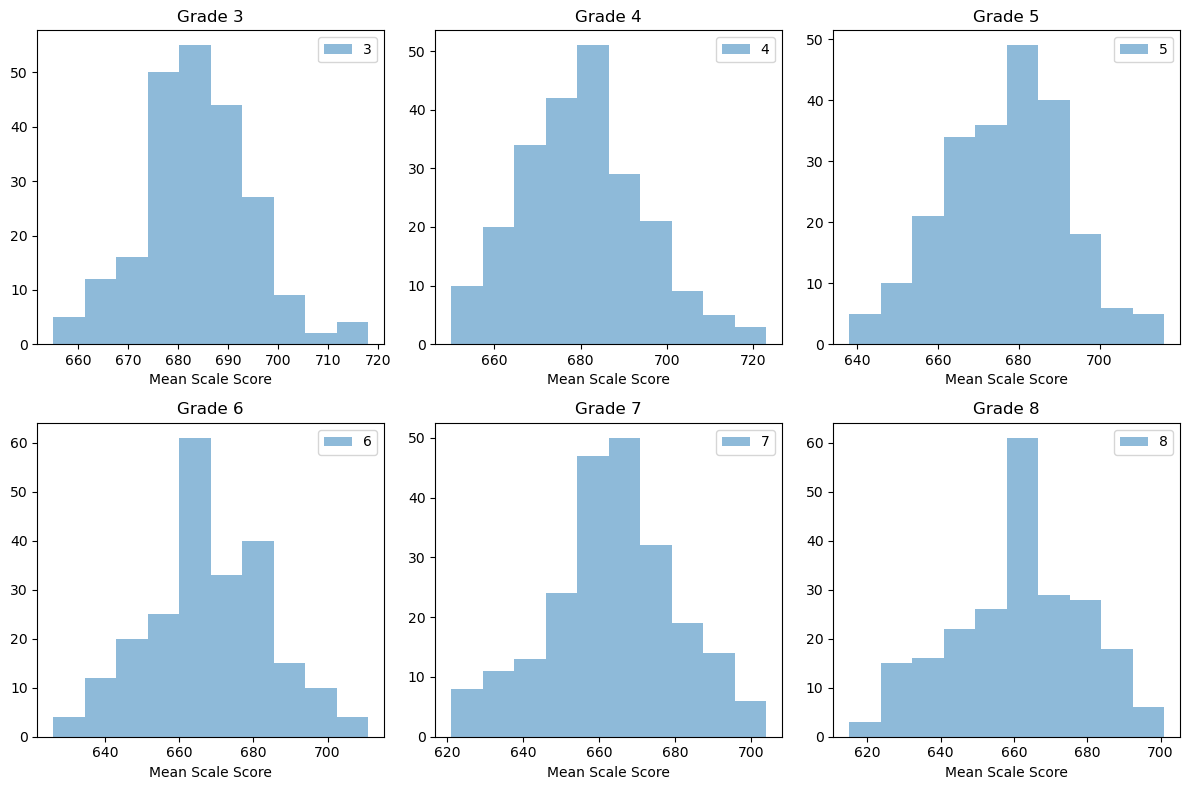

In [76]:
import matplotlib.pyplot as plt

df = pd.DataFrame(school_data)

# unique grade levels
grades = df['Grade'].unique()

# histograms for each grade level
plt.figure(figsize=(12, 8))
for i, grade in enumerate(grades, 1):
    plt.subplot(2, 3, i) 
    subset = df[df['Grade'] == grade]['Mean Scale Score']
    plt.hist(subset, bins=10, alpha=0.5, label=grade)
    plt.xlabel('Mean Scale Score')
    plt.title(f'Grade {grade}')
    plt.legend()

plt.tight_layout() 
plt.show()

### Plots the 'Mean Scale Score' on the y-axis and 'District' on the x-axis for the entire dataframe. Uses the 'o' style for the plot. The 'o' tells matplotlib to use dots instead of lines to make a point for the 'Mean Scale Score' by District.

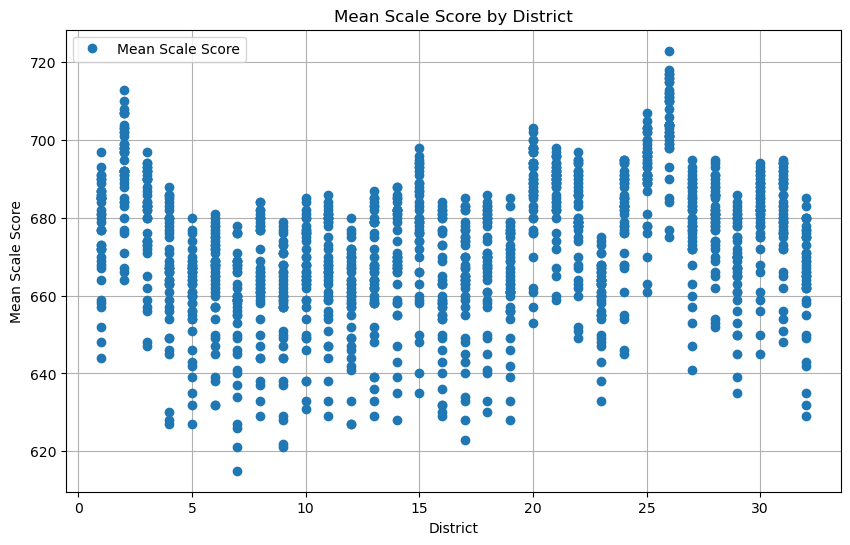

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(school_data)

# Plot 'Mean Scale Score' on the y-axis and 'District' on the x-axis as dots
df.plot( x='District', y='Mean Scale Score', style='o', figsize=(10, 6))

plt.xlabel('District')
plt.ylabel('Mean Scale Score')
plt.title('Mean Scale Score by District')
plt.grid(True)
plt.show()

### Insights from the Visual Data

### District 26 seems to have higher mean scale score as compaired to other districts. District 2 has a comparable performace with 26 although slighly lower than 26. On the other hand, district 7 has the worst score followed by district 9. 
### We can conclude that district 7 and similar perfoming school districts in New Yoork need more attention and investment to improve the grade outcomes. They should also consider replicating the actions district 26 and 2 are taking in maintaining their superior performance.

## 6. Analyzing the Data

## A. Top Performing Districts
### The "top" function accepts a dataframe as its first input, a parameter named *n* that accepts a number and provides a reasonable default, and a parameter called *column* that defaults to 'Mean Scale Score'.



In [79]:
def top(df, n=5, column='Mean Scale Score'):
    return df.sort_values(by=column, ascending=False)[:n]
  
   

In [80]:
 top(school_data, n=6)

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
1235,26,4,2009,All Students,1621,723,8,0.5,33,2.0,413,25.5,1167,72.0,1580,97.5
1228,26,3,2009,All Students,1704,718,1,0.1,11,0.6,759,44.5,933,54.8,1692,99.3
1229,26,3,2010,All Students,1597,717,24,1.5,197,12.3,555,34.8,821,51.4,1376,86.2
1238,26,4,2012,All Students,1682,717,17,1.0,110,6.5,452,26.9,1103,65.6,1555,92.4
1245,26,5,2012,All Students,1713,716,30,1.8,115,6.7,489,28.5,1079,63.0,1568,91.5
1236,26,4,2010,All Students,1784,716,18,1.0,143,8.0,578,32.4,1045,58.6,1623,91.0


### Uses *apply* method and *top* function to display the full row for the top score in each grade.

In [82]:
school_data.groupby('Grade').apply(top)

District Grade  Year   Demographic  Number Tested  \
Grade                                                           
3     1228        26     3  2009  All Students           1704   
      1229        26     3  2010  All Students           1597   
      1227        26     3  2008  All Students           1615   
      1226        26     3  2007  All Students           1636   
      1225        26     3  2006  All Students           1621   
4     1235        26     4  2009  All Students           1621   
      1238        26     4  2012  All Students           1682   
      1236        26     4  2010  All Students           1784   
      1237        26     4  2011  All Students           1653   
      1234        26     4  2008  All Students           1637   
5     1245        26     5  2012  All Students           1713   
      1244        26     5  2011  All Students           1831   
      1241        26     5  2008  All Students           1709   
      1243        26     5  2010  All Students           1685   
      1242        26     5  2009  All Students           1696   
6     1252        26     6  2012  All Students           1954   
      1251        26     6  2011  All Students           1823   
      1249        26     6  2009  All Students           1872   
      1250        26     6  2010  All Students           1882   
      1248        26     6  2008  All Students           1875   
7     1259        26     7  2012  All Students           1863   
      1256        26     7  2009  All Students           1960   
      1258        26     7  2011  All Students           1910   
      1257        26     7  2010  All Students           1933   
      1255        26     7  2008  All Students           1918   
8     1266        26     8  2012  All Students           1952   
      1265        26     8  2011  All Students           1966   
      1264        26     8  2010  All Students           2037   
      1263        26     8  2009  All Students           2009   
      1262        26     8  2008  All Students           1988   

            Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade                                                                 
3     1228               718            1          0.1           11   
      1229               717           24          1.5          197   
      1227               713            8          0.5           25   
      1226               712           13          0.8           41   
      1225               708           12          0.7           40   
4     1235               723            8          0.5           33   
      1238               717           17          1.0          110   
      1236               716           18          1.0          143   
      1237               715           15          0.9          142   
      1234               715           13          0.8           35   
5     1245               716           30          1.8          115   
      1244               711           24          1.3          137   
      1241               710           11          0.6           40   
      1243               710           13          0.8          138   
      1242               710           11          0.6           22   
6     1252               711           36          1.8          152   
      1251               706           30          1.6          201   
      1249               704           14          0.7           82   
      1250               704           33          1.8          257   
      1248               702           22          1.2           93   
7     1259               704           39          2.1          176   
      1256               704            9          0.5           65   
      1258               702           41          2.1          179   
      1257               701           39          2.0          250   
      1255               699           14          0.7          104   
8     1266    

### Insights from above data

### The top scores are mostly from district 26 with score higher that 680 which means it is the top performing district in New York.

### Shows the row for the top score for each combination of grade and year.

In [84]:
school_data.groupby(['Grade', 'Year']).apply(top)

District Grade  Year   Demographic  Number Tested  \
Grade Year                                                           
3     2006 1225        26     3  2006  All Students           1621   
           1176        25     3  2006  All Students           2171   
           931         20     3  2006  All Students           2915   
           49           2     3  2006  All Students           2281   
           1470        31     3  2006  All Students           4305   
...                   ...   ...   ...           ...            ...   
8     2012 1266        26     8  2012  All Students           1952   
           91           2     8  2012  All Students           2304   
           1021        21     8  2012  All Students           2705   
           1217        25     8  2012  All Students           2390   
           972         20     8  2012  All Students           3492   

                 Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade Year                                                                 
3     2006 1225               708           12          0.7           40   
           1176               697           44          2.0          132   
           931                691          118          4.0          270   
           49                 690           79          3.5          169   
           1470               684          288          6.7          467   
...                           ...          ...          ...          ...   
8     2012 1266               701           35          1.8          268   
           91                 692           98          4.3          481   
           1021               691          109          4.0          608   
           1217               690           74          3.1          543   
           972                689          153          4.4          863   

                 Pct Level 2  Num Level 3  Pct Level 3  Num Level 4  \
Grade Year                                                            
3     2006 1225          2.5          654         40.3          915   
           1176          6.1         1040         47.9          955   
           931           9.3         1384         47.5         1143   
           49            7.4         1169         51.2          864   
           1470         10.8         2091         48.6         1459   
...                      ...          ...          ...          ...   
8     2012 1266         13.7          712         36.5          937   
           91           20.9          890         38.6          835   
           1021         22.5         1038         38.4          950   
           1217         22.7         1037         43.4          736   
           972          24.7         1319         37.8         1157   

                 Pct Level 4  Num Level 3 and 4  Pct Level 3 and 4  
Grade Year                                                          
3     2006 1225         56.4               1569               96.8  
           1176         44.0               1995               91.9  
           931          39.2               2527               86.7  
           49           37.9               2033               89.1  
           1470         33.9               3550               82.5  
...                      ...                ...                ...  
8     2012 1266         48.0               1649               84.5  
           91           36.2               1725               74.9  
           1021         35.1               1988               73.5  
           1217         30.8               1773               74.2  
           972          33.1               2476               70.9  

[210 rows x 16 columns]

## Trends among Top Performers

### Using the DataFrame *plot* method to plot the performance by grade of the top district across time.

<Figure size 1000x600 with 0 Axes>

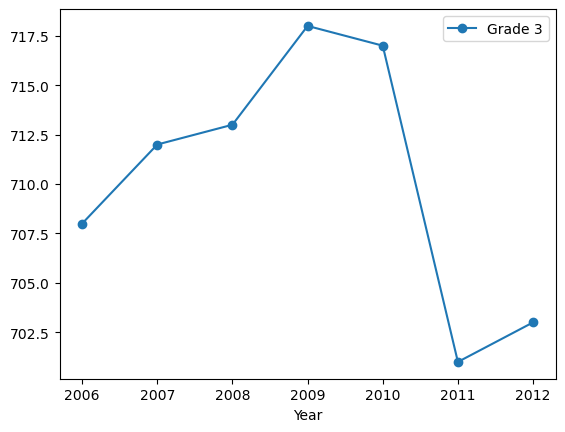

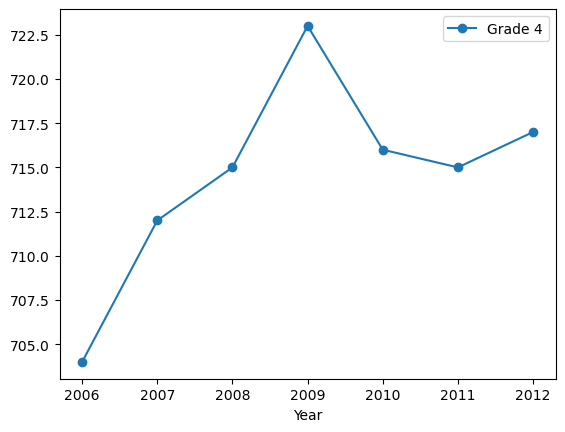

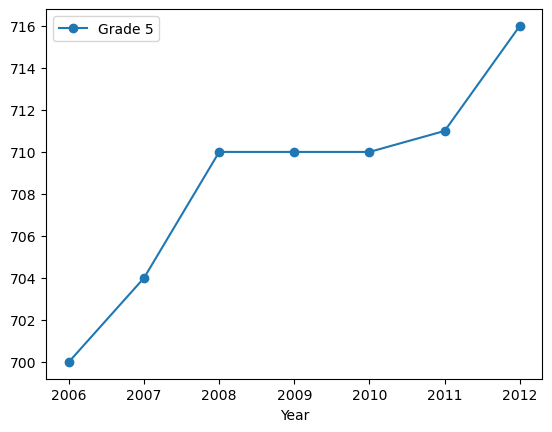

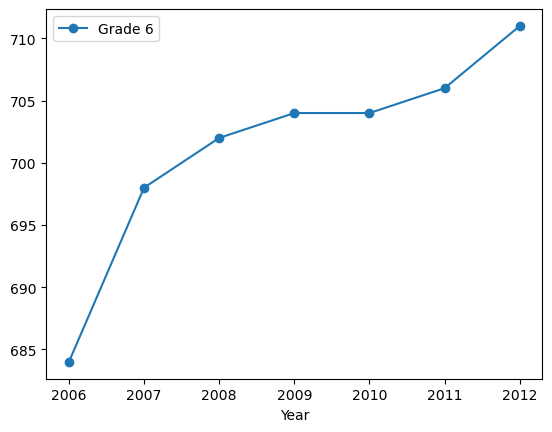

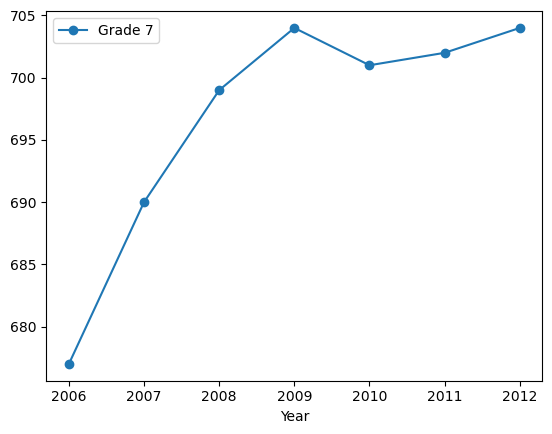

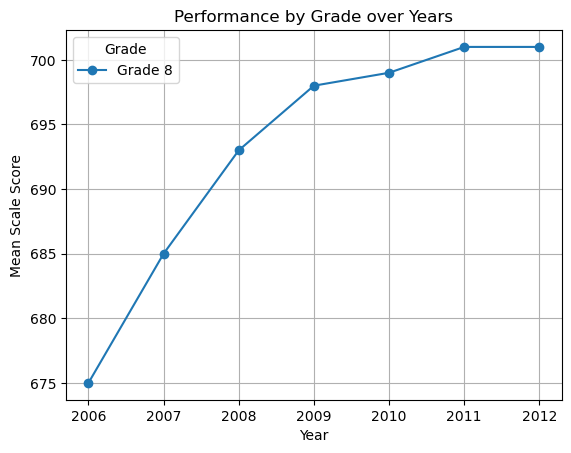

In [85]:
df = pd.DataFrame(school_data)

# Getting top district based on Mean Scale Score
top_district = top(df, n=1, column='Mean Scale Score')['District'].iloc[0]

# Filtering data for the top district
top_district_data = df[df['District'] == top_district]

# data by grade
grouped_data = top_district_data.groupby('Grade')

# Plot 
plt.figure(figsize=(10, 6))

for grade, data in grouped_data:
    data.plot(x='Year', y='Mean Scale Score', label=f'Grade {grade}', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Mean Scale Score')
plt.title(f'Performance by Grade over Years')
plt.legend(title='Grade')
plt.grid(True)
plt.show()


### Insight from the Previous Line Graphs

### The data shows a significant improvement in Mean scale scores for every grade level between 2009 and 2012. But during the year 2010 and 2011, these top performing schools districts witnessed a sharp decline or stagnation in their scores in almost every grade level, particularly in grade 3. After 2011, the schools are performing better than the previous years.

## Districts That Need Improvement

### A function *bottom* returns the *n* rows with the lowest value for the specified *column*; *bottom* accepts a dataframe as its first input, a parameter named *n* that accepts a number and provides a reasonable default, and a paramater called *column* that defaults to 'Mean Scale Score'.

In [88]:
def bottom(df, n=5, column='Mean Scale Score'):
    return df.sort_values(by=column, ascending=True)[:n]

In [91]:
 bottom(school_data, n=6) # bottom 6 school districts of New York

,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
330,7,8,2006,All Students,1540,615,648,42.1,652,42.3,231,15.0,9,0.6,240,15.6
323,7,7,2006,All Students,1648,621,520,31.6,769,46.7,339,20.6,20,1.2,359,21.8
428,9,8,2006,All Students,3292,621,1313,39.9,1352,41.1,584,17.7,43,1.3,627,19.0
421,9,7,2006,All Students,3205,622,1046,32.6,1334,41.6,782,24.4,43,1.3,825,25.7
819,17,8,2006,All Students,2521,623,923,36.6,999,39.6,571,22.6,28,1.1,599,23.8
316,7,6,2006,All Students,1569,626,553,35.2,588,37.5,387,24.7,41,2.6,428,27.3


### Uses the *apply* method and *bottom* function to display the full row for the bottom score in each grade.

In [94]:
school_data.groupby('Grade').apply(bottom)

District Grade  Year   Demographic  Number Tested  \
Grade                                                          
3     295         7     3  2006  All Students           1463   
      197         5     3  2006  All Students           1149   
      736        16     3  2006  All Students           1021   
      393         9     3  2006  All Students           3226   
      540        12     3  2006  All Students           2019   
4     302         7     4  2006  All Students           1394   
      400         9     4  2006  All Students           3016   
      303         7     4  2007  All Students           1475   
      253         6     4  2006  All Students           2557   
      743        16     4  2006  All Students            905   
5     407         9     5  2006  All Students           3056   
      211         5     5  2006  All Students           1154   
      309         7     5  2006  All Students           1570   
      554        12     5  2006  All Students           1908   
      799        17     5  2006  All Students           2177   
6     316         7     6  2006  All Students           1569   
      414         9     6  2006  All Students           2932   
      757        16     6  2006  All Students            946   
      58         17     6  2006  All Students           2317   
      610        13     6  2006  All Students           1170   
7     323         7     7  2006  All Students           1648   
      421         9     7  2006  All Students           3205   
      568        12     7  2006  All Students           1887   
      176         4     7  2006  All Students           1420   
      910        19     7  2006  All Students           2250   
8     330         7     8  2006  All Students           1540   
      428         9     8  2006  All Students           3292   
      819        17     8  2006  All Students           2521   
      232         5     8  2006  All Students           1324   
      575        12     8  2006  All Students           1652   

           Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade                                                                
3     295               655          232         15.9          351   
      197               656          181         15.8          296   
      736               657          170         16.7          241   
      393               657          500         15.5          763   
      540               659          284         14.1          420   
4     302               650          245         17.6          407   
      400               650          547         18.1          891   
      303               653          223         15.1          461   
      253               654          417         16.3          702   
      743               654          148         16.4          256   
5     407               638          751         24.6         1137   
      211               639          284         24.6          446   
      309               640          365         23.2          581   
      554               644          370         19.4          655   
      799               645          413         19.0          763   
6     316               626          553         35.2          588   
      414               628          963         32.8         1089   
      757               632          272         28.8          337   
      58                633          648         28.0          885   
      610               636          302         25.8          440   
7     323               621          520         31.6          769   
      421               622         1046         32.6         1334   
      568               627          494         26.2          877   
      176               627          364         25.6          687   
      910               628          639         28.4          908   
8     330               615          648         42.1          652   
  

### Insight from the data

### It seems that district 7, 9, and 5 are frequently appearing in the bottom list of the Mean Scale Score. We can infer that these school districts performed poorly relative to other districts, particularly in 2006.

### Shows the rows for the bottom score for the combination of grade and year.

In [100]:
school_data.groupby(['Grade', 'Year']).apply(bottom)

District Grade  Year   Demographic  Number Tested  \
Grade Year                                                           
3     2006 295          7     3  2006  All Students           1463   
           197          5     3  2006  All Students           1149   
           736         16     3  2006  All Students           1021   
           393          9     3  2006  All Students           3226   
           540         12     3  2006  All Students           2019   
...                   ...   ...   ...           ...            ...   
8     2012 336          7     8  2012  All Students           1333   
           923         19     8  2012  All Students           1914   
           385          8     8  2012  All Students           2400   
           1119        23     8  2012  All Students           1281   
           238          5     8  2012  All Students           1089   

                 Mean Scale Score  Num Level 1  Pct Level 1  Num Level 2  \
Grade Year                                                                 
3     2006 295                655          232         15.9          351   
           197                656          181         15.8          296   
           736                657          170         16.7          241   
           393                657          500         15.5          763   
           540                659          284         14.1          420   
...                           ...          ...          ...          ...   
8     2012 336                662          214         16.1          646   
           923                663          273         14.3          994   
           385                663          386         16.1         1156   
           1119               664          175         13.7          645   
           238                664          178         16.3          485   

                 Pct Level 2  Num Level 3  Pct Level 3  Num Level 4  \
Grade Year                                                            
3     2006 295          24.0          749         51.2          131   
           197          25.8          553         48.1          119   
           736          23.6          480         47.0          130   
           393          23.7         1591         49.3          372   
           540          20.8         1088         53.9          227   
...                      ...          ...          ...          ...   
8     2012 336          48.5          382         28.7           91   
           923          51.9          534         27.9          113   
           385          48.2          705         29.4          153   
           1119         50.4          382         29.8           79   
           238          44.5          325         29.8          101   

                 Pct Level 4  Num Level 3 and 4  Pct Level 3 and 4  \
Grade Year                                                           
3     2006 295           9.0                880               60.2   
           197          10.4                672               58.5   
           736          12.7                610               59.7   
           393          11.5               1963               60.8   
           540          11.2               1315               65.1   
...                      ...                ...                ...   
8     2012 336           6.8                473               35.5   
           923           5.9                647               33.8   
           385           6.4                858               35.8   
           1119          6.2                461               36.0   
           238           9.3                426               39.1   

                 Default Rank  
Grade Year                     
3     2006 295         1152.0  
           197         1138.0  
           736         1121.0  
           393         1121.0  
           540         1076.5  
...                       ...  
8     2012 336         100